# House price prediction with machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [8]:
df.drop("date", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)
df.drop("waterfront", axis=1, inplace=True)
df.drop("view", axis=1, inplace=True)
df.drop("long", axis=1, inplace=True)
df.drop("lat", axis=1, inplace=True)
df.drop("yr_renovated", axis=1, inplace=True)

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,1800,7503


In [10]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
df['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64

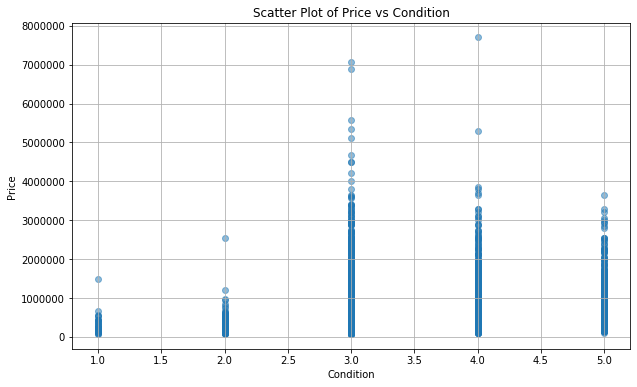

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['condition'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Splitting the data

In [13]:
X = df.drop(columns='price', axis=1)
Y = df['price']

In [14]:
print(X)


       bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3       1.00         1180      5650     1.0          3      7   
1             3       2.25         2570      7242     2.0          3      7   
2             2       1.00          770     10000     1.0          3      6   
3             4       3.00         1960      5000     1.0          5      7   
4             3       2.00         1680      8080     1.0          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21608         3       2.50         1530      1131     3.0          3      8   
21609         4       2.50         2310      5813     2.0          3      8   
21610         2       0.75         1020      1350     2.0          3      7   
21611         3       2.50         1600      2388     2.0          3      8   
21612         2       0.75         1020      1076     2.0          3      7   

       sqft_above  sqft_basement  yr_built  zipcode

In [15]:
print(Y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [16]:
type(Y)

pandas.core.series.Series

In [17]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Splitting the data to training and testing data sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(21613, 13) (15129, 13) (6484, 13)


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15129 entries, 14614 to 5994
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15129 non-null  int64  
 1   bathrooms      15129 non-null  float64
 2   sqft_living    15129 non-null  int64  
 3   sqft_lot       15129 non-null  int64  
 4   floors         15129 non-null  float64
 5   condition      15129 non-null  int64  
 6   grade          15129 non-null  int64  
 7   sqft_above     15129 non-null  int64  
 8   sqft_basement  15129 non-null  int64  
 9   yr_built       15129 non-null  int64  
 10  zipcode        15129 non-null  int64  
 11  sqft_living15  15129 non-null  int64  
 12  sqft_lot15     15129 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.6 MB


In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 4131 to 19582
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       6484 non-null   int64  
 1   bathrooms      6484 non-null   float64
 2   sqft_living    6484 non-null   int64  
 3   sqft_lot       6484 non-null   int64  
 4   floors         6484 non-null   float64
 5   condition      6484 non-null   int64  
 6   grade          6484 non-null   int64  
 7   sqft_above     6484 non-null   int64  
 8   sqft_basement  6484 non-null   int64  
 9   yr_built       6484 non-null   int64  
 10  zipcode        6484 non-null   int64  
 11  sqft_living15  6484 non-null   int64  
 12  sqft_lot15     6484 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 709.2 KB


In [22]:
Y_train.value_counts

<bound method IndexOpsMixin.value_counts of 14614    479000.0
5805     535000.0
20435    491000.0
13849    345000.0
6932     280000.0
           ...   
6400     345000.0
15288    250000.0
11513    349950.0
1688     510000.0
5994     286000.0
Name: price, Length: 15129, dtype: float64>

## Model Building

# 1. Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
l_r=LinearRegression()

In [25]:
#traning
l_r.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:

y_pred_lr=l_r.predict(X_test)

y_pred_lr

array([ 446543.67614698, 1314806.62014265,  808445.99611333, ...,
        131905.46364563,  413132.24245817,  313734.88528926])

In [27]:
y_pred_rf=l_r.predict(X_test)

l_r.score(X_test,Y_test)
l_r.score(X_train,Y_train)

0.6212841274461316

In [28]:
print("accuracy of DT on training set:{:.2f}".format(l_r.score(X_train,Y_train)))
print("accuracy of DT on test set:{:.2f}".format(l_r.score(X_test,Y_test)) ) 

accuracy of DT on training set:0.62
accuracy of DT on test set:0.62


In [29]:

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [30]:
print("-----linear regression - model evaluation----")
print("mean absolute error(MAE):{}".format(mae(Y_test,y_pred_rf)))
print("mean squared error(MSE):{}".format(mse(Y_test,y_pred_rf)))
print("root mean squared error(RMSE):{}".format(np.sqrt(mse(Y_test,y_pred_rf))))

-----linear regression - model evaluation----
mean absolute error(MAE):144344.60540375425
mean squared error(MSE):51410910473.73795
root mean squared error(RMSE):226739.7417166606


## Decision Trees

In [31]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor=DecisionTreeRegressor()

decision_regressor.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
y_pred_dt=decision_regressor.predict(X_test)

decision_regressor.score(X_test,Y_test)
decision_regressor.score(X_train,Y_train)

0.9994093839027941

In [33]:
print("accuracy of DT on training set:{:.2f}".format(decision_regressor.score(X_train,Y_train)))
print("accuracy of DT on test set:{:.2f}".format(decision_regressor.score(X_test,Y_test)) )  

accuracy of DT on training set:1.00
accuracy of DT on test set:0.62


In [34]:
print("-----decision regression - model evaluation----")
print("mean absolute error(MAE):{}".format(mae(Y_test,y_pred_dt)))
print("mean squared error(MSE):{}".format(mse(Y_test,y_pred_dt)))
print("root mean squared error(RMSE):{}".format(np.sqrt(mse(Y_test,y_pred_dt))))

-----decision regression - model evaluation----
mean absolute error(MAE):125256.48565700185
mean squared error(MSE):50942381787.690315
root mean squared error(RMSE):225704.19089527405


## Random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
random_regressor=RandomForestRegressor()
random_regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
y_pred_rf=random_regressor.predict(X_test)

random_regressor.score(X_test,Y_test)
random_regressor.score(X_train,Y_train)

0.968970193995923

In [37]:
print("accuracy of DT on training set:{:.2f}".format(random_regressor.score(X_train,Y_train)))
print("accuracy of DT on test set:{:.2f}".format(random_regressor.score(X_test,Y_test)) )  

accuracy of DT on training set:0.97
accuracy of DT on test set:0.80


In [38]:
print("-----decision regression - model evaluation----")
print("mean absolute error(MAE):{}".format(mae(Y_test,y_pred_rf)))
print("mean squared error(MSE):{}".format(mse(Y_test,y_pred_rf)))
print("root mean squared error(RMSE):{}".format(np.sqrt(mse(Y_test,y_pred_rf))))

-----decision regression - model evaluation----
mean absolute error(MAE):90781.34599275875
mean squared error(MSE):27212655455.212654
root mean squared error(RMSE):164962.58804714677


## Support Vector Regression

In [39]:
from sklearn.svm import SVR

In [40]:
svr_model = SVR()

In [41]:
svr_model.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
y_pred_sv=random_regressor.predict(X_test)

svr_model.score(X_test,Y_test)
svr_model.score(X_train,Y_train)

-0.05917471664376839

In [43]:
print("accuracy of DT on training set:{:.2f}".format(svr_model.score(X_train,Y_train)))
print("accuracy of DT on test set:{:.2f}".format(svr_model.score(X_test,Y_test)) ) 

accuracy of DT on training set:-0.06
accuracy of DT on test set:-0.06


In [44]:
print("-----decision regression - model evaluation----")
print("mean absolute error(MAE):{}".format(mae(Y_test,y_pred_sv)))
print("mean squared error(MSE):{}".format(mse(Y_test,y_pred_sv)))
print("root mean squared error(RMSE):{}".format(np.sqrt(mse(Y_test,y_pred_sv))))

-----decision regression - model evaluation----
mean absolute error(MAE):90781.34599275875
mean squared error(MSE):27212655455.212654
root mean squared error(RMSE):164962.58804714677


## Visualization

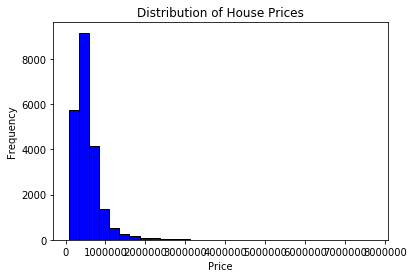

In [45]:
plt.hist(df['price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


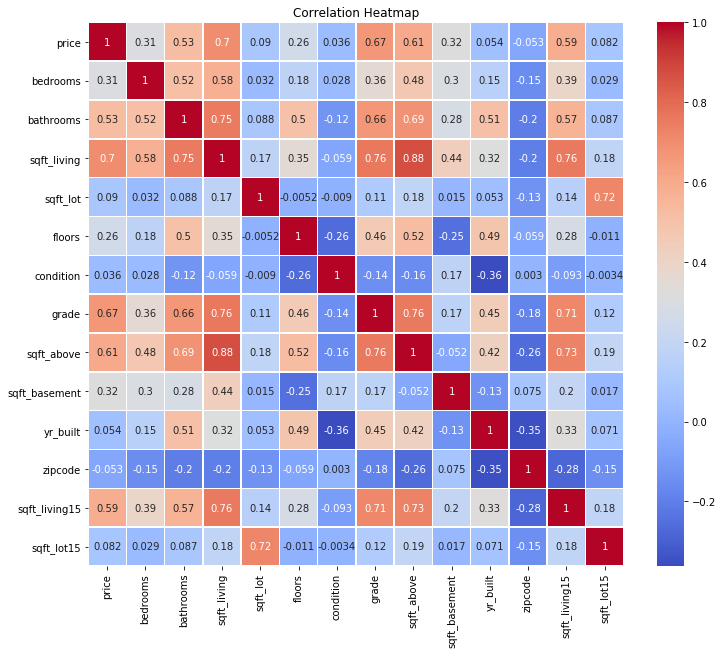

In [46]:
## Corelation heatmap
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


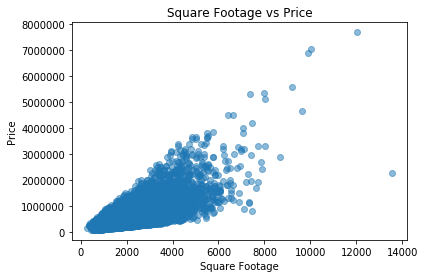

In [47]:
plt.scatter(df['sqft_living'], df['price'], alpha=0.5)
plt.title('Square Footage vs Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()


In [48]:
def predict_house_price_from_user_input(model):
    
    feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                     'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15']

    
    user_input = {}


    for feature in feature_names:
        user_input[feature] = float(input(f'Enter the value for {feature}: '))

    input_features = pd.DataFrame([user_input])


    predictions = model.predict(input_features)


    predicted_price = predictions[0]

    return predicted_price

predicted_price_user_input = predict_house_price_from_user_input(random_regressor)

print(f'Predicted House Price: ${predicted_price_user_input:.2f}')

Enter the value for bedrooms: 3
Enter the value for bathrooms: 2
Enter the value for sqft_living: 450
Enter the value for sqft_lot: 720
Enter the value for floors: 1
Enter the value for condition: 3
Enter the value for grade: 9
Enter the value for sqft_above: 780
Enter the value for sqft_basement: 950
Enter the value for yr_built: 1999
Enter the value for zipcode: 50136
Enter the value for sqft_living15: 840
Enter the value for sqft_lot15: 789
Predicted House Price: $418628.02


In [49]:
pip install tk

Note: you may need to restart the kernel to use updated packages.


In [55]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd

# Assuming you have your working model already defined in the notebook as 'random_regressor'
# Make sure it's trained before running this code

def predict_house_price(features, model):
    # Convert features to a DataFrame
    input_features = pd.DataFrame([features])

    # Make predictions using the model
    predictions = model.predict(input_features)

    # Assuming you want a single predicted price, return the first element
    predicted_price = predictions[0]

    return predicted_price

def predict_from_gui():
    # Get user input from the GUI
    user_input = {
        'bedrooms': float(entry_vars['bedrooms'].get()),
        'bathrooms': float(entry_vars['bathrooms'].get()),
        'sqft_living': float(entry_vars['sqft_living'].get()),
        'sqft_lot': float(entry_vars['sqft_lot'].get()),
        'floors': float(entry_vars['floors'].get()),
        'condition': float(entry_vars['condition'].get()),
        'grade': float(entry_vars['grade'].get()),
        'sqft_above': float(entry_vars['sqft_above'].get()),
        'sqft_basement': float(entry_vars['sqft_basement'].get()),
        'yr_built': float(entry_vars['yr_built'].get()),
        'zipcode': float(entry_vars['zipcode'].get()),
        'sqft_living15': float(entry_vars['sqft_living15'].get()),
        'sqft_lot15': float(entry_vars['sqft_lot15'].get())
    }

    # Predict the house price using the user input and the existing model
    predicted_price = predict_house_price(user_input, random_regressor)

    # Display the predicted price in a message box
    messagebox.showinfo('Prediction Result', f'Predicted House Price: ${predicted_price:.2f}')

# Create the main GUI window
root = tk.Tk()
root.title('House Price Prediction')

# Create labels and entry widgets for each feature
features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15'
]

# Create entry variables for each feature
entry_vars = {feature: tk.DoubleVar() for feature in features}

for i, feature in enumerate(features):
    ttk.Label(root, text=feature).grid(row=i, column=0, padx=10, pady=5)
    ttk.Entry(root, textvariable=entry_vars[feature]).grid(row=i, column=1, padx=10, pady=5)

# Create a button to trigger prediction
predict_button = ttk.Button(root, text='Predict', command=predict_from_gui)
predict_button.grid(row=len(features), column=0, columnspan=2, pady=10)

# Start the Tkinter event loop
root.mainloop()


## THANK YOU 